In [5]:
import random

import pandas as pd
import numpy as np
import geopandas
import pysal
import seaborn
import contextily
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from geopy.distance import great_circle
from shapely.geometry import MultiPoint
import random

In [6]:
limitedDataset = pd.read_csv("./data/limtedDataSet.csv", index_col=0)
limitedDataset.head()

,lat,long,time,userNumber
0,39.984702,116.318417,1.224730e+09,0
1,39.984288,116.299943,1.224731e+09,0
2,39.983557,116.299235,1.224731e+09,0
3,39.995777,116.286798,1.224735e+09,0
4,39.996832,116.285446,1.224735e+09,0


In [64]:
limitedDataset.describe()

,lat,long,time,userNumber
count,697279.000000,697279.000000,6.972790e+05,697279.000000
mean,39.080813,112.287790,1.242473e+09,79.266674
std,3.915662,28.275930,3.058664e+07,56.977834
min,1.044024,-179.969593,9.467683e+08,0.000000
25%,39.909022,116.307058,1.225447e+09,25.000000
50%,39.975403,116.338408,1.236690e+09,68.000000
75%,40.006018,116.431037,1.247633e+09,128.000000
max,400.166667,179.996942,1.343378e+09,181.000000


In [ ]:
seaborn.jointplot(x='lat', y='long', data=limitedDataset, s=1)

In [7]:
limitedDataset = limitedDataset[:1000]

In [86]:
limitedDataset.describe()

,lat,long,time,userNumber
count,1000.000000,1000.000000,1.000000e+03,1000.0
mean,39.995994,116.336236,1.232342e+09,0.0
std,0.028002,0.059470,6.066012e+06,0.0
min,39.887335,116.262689,1.224730e+09,0.0
25%,39.994537,116.317275,1.226559e+09,0.0
50%,40.003726,116.321750,1.229060e+09,0.0
75%,40.008892,116.326119,1.238747e+09,0.0
max,40.079504,116.613898,1.238853e+09,0.0


In [87]:
llat = limitedDataset[(limitedDataset['lat'] >= 41) | (limitedDataset['lat'] <= 39) ].index
hold = limitedDataset.drop(llat, inplace = False)

In [88]:
hold.describe()

,lat,long,time,userNumber
count,1000.000000,1000.000000,1.000000e+03,1000.0
mean,39.995994,116.336236,1.232342e+09,0.0
std,0.028002,0.059470,6.066012e+06,0.0
min,39.887335,116.262689,1.224730e+09,0.0
25%,39.994537,116.317275,1.226559e+09,0.0
50%,40.003726,116.321750,1.229060e+09,0.0
75%,40.008892,116.326119,1.238747e+09,0.0
max,40.079504,116.613898,1.238853e+09,0.0


In [89]:
llong = hold[(hold['long'] >=117) | (hold['long'] <= 115) ].index
limitedDataset = hold.drop(llong, inplace = False)

In [90]:
limitedDataset.describe()

,lat,long,time,userNumber
count,1000.000000,1000.000000,1.000000e+03,1000.0
mean,39.995994,116.336236,1.232342e+09,0.0
std,0.028002,0.059470,6.066012e+06,0.0
min,39.887335,116.262689,1.224730e+09,0.0
25%,39.994537,116.317275,1.226559e+09,0.0
50%,40.003726,116.321750,1.229060e+09,0.0
75%,40.008892,116.326119,1.238747e+09,0.0
max,40.079504,116.613898,1.238853e+09,0.0


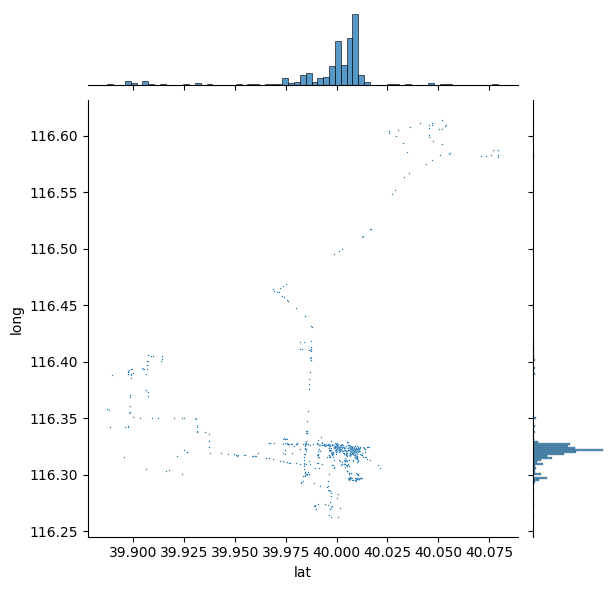

In [91]:
seaborn.jointplot(x='lat',y='long',data=limitedDataset, s=1)

In [92]:
limitedDataset.to_csv("./data/onlyB_40_116.csv")

In [ ]:
joint_axes = seaborn.jointplot(x='lat',y='long', data=limitedDataset, s = 0.5)

Codes comes form https://geoffboeing.com/2014/08/clustering-to-reduce-spatial-data-set-size/


In [21]:
limitedDataset = limitedDataset[['lat','long']].values

In [23]:
limitedDataset

array([[ 39.984702, 116.318417],
       [ 39.984288, 116.299943],
       [ 39.983557, 116.299235],
       ...,
       [ 39.981875, 116.30975 ],
       [ 39.983984, 116.308085],
       [ 39.987166, 116.309207]])

In [24]:
kms_per_radian = 6371.0088
epsilon = 1.5 / kms_per_radian
db = DBSCAN(eps=epsilon, min_samples=1, algorithm='ball_tree', metric='haversine').fit(np.radians(limitedDataset))
cluster_labels = db.labels_
num_clusters = len(set(cluster_labels))
clusters = pd.Series([limitedDataset[cluster_labels == n] for n in range(num_clusters)])
print(clusters.values)
print('Number of clusters: {}'.format(num_clusters))

[array([[ 39.984702, 116.318417],
        [ 39.984288, 116.299943],
        [ 39.983557, 116.299235],
        ...,
        [ 39.981875, 116.30975 ],
        [ 39.983984, 116.308085],
        [ 39.987166, 116.309207]]) array([[ 39.895524, 116.315621]])
 array([[ 39.986519, 116.384982],
        [ 39.987017, 116.403146],
        [ 39.987165, 116.410129],
        [ 39.986357, 116.410684],
        [ 39.983063, 116.411093],
        [ 39.981853, 116.411476],
        [ 39.982109, 116.41757 ],
        [ 39.984218, 116.417706],
        [ 39.987247, 116.417992],
        [ 39.987637, 116.431542],
        [ 39.984583, 116.440284],
        [ 39.979835, 116.448024],
        [ 39.976074, 116.453839],
        [ 39.974076, 116.45701 ],
        [ 39.970875, 116.461673],
        [ 39.968962, 116.464223],
        [ 39.969314, 116.462838],
        [ 39.973567, 116.467418],
        [ 39.975141, 116.468803],
        [ 39.972315, 116.465224],
        [ 39.971779, 116.46193 ],
        [ 39.973384, 116.458405],


In [25]:
def get_centermost_point(cluster):
    centroid = (MultiPoint(cluster).centroid.x, MultiPoint(cluster).centroid.y)
    centermost_point = min(cluster, key=lambda point: great_circle(point, centroid).m)
    return tuple(centermost_point)
centermost_points = clusters.map(get_centermost_point)

In [28]:
lats, lons = zip(*centermost_points)
rep_points = pd.DataFrame({'lat':lats, 'long':lons})

In [123]:
rep_points

,lat,long
0,39.996561,116.321043
1,39.895524,116.315621
2,39.988008,116.430390
3,40.012733,116.510759
4,40.045578,116.599043
5,40.076019,116.582678


In [29]:
numberoftrjacectectories = 10
approxNumbStops = 3
trjacetories = []
h = None
for x in range(0,10,1):
    numberstops = random.randint(2,approxNumbStops)
    listindex = random.sample(range(0, rep_points.shape[0]),numberstops)
    locations = []
    for x in listindex:
        locations.append(rep_points.loc[x, ['lat','long']].to_list())
    trjacetories.append(locations)



In [37]:
for i in range(0,2):
    print(i)

0
1


In [42]:
random.sample(range(0,2), 3)

ValueError: Sample larger than population or is negative